In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv('grid_search.csv')

In [19]:
print(f'Всего было {df.shape[0]} запусков из которых {df[df['error'] == 0].shape[0]} завершились успешно')

Всего было 275 запусков из которых 0 завершились успешно


In [20]:
df.groupby('n_samples')['error'].sum()

n_samples
1      25
10     25
20     25
30     25
40     25
50     25
60     25
70     25
80     25
90     25
100    25
Name: error, dtype: int64

In [21]:
pd.DataFrame(df[df['error'] == 1].groupby(['l1_ratio', 'penalizer']).size())

0
l1_ratio   penalizer     
0.001000   0.001000    11
           0.017783    11
           0.316228    11
           5.623413    11
           100.000000  11
0.017783   0.001000    11
           0.017783    11
           0.316228    11
           5.623413    11
           100.000000  11
0.316228   0.001000    11
           0.017783    11
           0.316228    11
           5.623413    11
           100.000000  11
5.623413   0.001000    11
           0.017783    11
           0.316228    11
           5.623413    11
           100.000000  11
100.000000 0.001000    11
           0.017783    11
           0.316228    11
           5.623413    11
           100.000000  11

Результат с лучшими параметрами по каждой из метрик

In [22]:
df[df['test_statistic'] == df['test_statistic'].max()]

,n_samples,l1_ratio,penalizer,p_val,test_statistic,ci_train,ci_test,ibs_train,ibs_test,error,error_text
26,10,0.001,0.017783,0.0,2860.65528,0.807969,0.810301,NaN,4.589375,1,!IBS_TRAIN$Found input variables with inconsis...


In [23]:
df[df['ci_train'] == df['ci_train'].max()]

,n_samples,l1_ratio,penalizer,p_val,test_statistic,ci_train,ci_test,ibs_train,ibs_test,error,error_text
11,1,0.316228,0.017783,1.0,-4831.93934,0.826207,0.823904,NaN,4.803806,1,!IBS_TRAIN$Found input variables with inconsis...


In [24]:
df[df['ci_test'] == df['ci_test'].max()]

,n_samples,l1_ratio,penalizer,p_val,test_statistic,ci_train,ci_test,ibs_train,ibs_test,error,error_text
11,1,0.316228,0.017783,1.0,-4831.93934,0.826207,0.823904,NaN,4.803806,1,!IBS_TRAIN$Found input variables with inconsis...


In [25]:
df[df['ibs_train'] == df['ibs_train'].min()]

,n_samples,l1_ratio,penalizer,p_val,test_statistic,ci_train,ci_test,ibs_train,ibs_test,error,error_text


In [26]:
df[(df['ibs_test'] == df['ibs_test'].min())]

,n_samples,l1_ratio,penalizer,p_val,test_statistic,ci_train,ci_test,ibs_train,ibs_test,error,error_text
264,100,0.316228,100.0,1.0,-173226.922748,0.811965,0.790521,NaN,0.392398,1,!IBS_TRAIN$Found input variables with inconsis...


# Графики

In [108]:
def draw_pandas_plot(df, metric, ticks):
    df_grouped = df.groupby('n_samples')[metric]
    metric_df = df.groupby('n_samples')[metric].agg(['mean', 'min', 'max'])
    return metric_df.plot(xlabel='n_samples', ylabel=metric, yticks=ticks)

<Axes: xlabel='n_samples', ylabel='ci_train'>

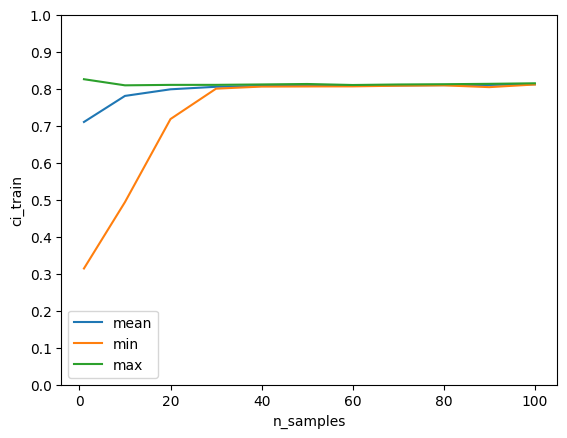

In [109]:
draw_pandas_plot(df, 'ci_train', np.arange(0, 1.1, 0.1))

<Axes: xlabel='n_samples', ylabel='ci_test'>

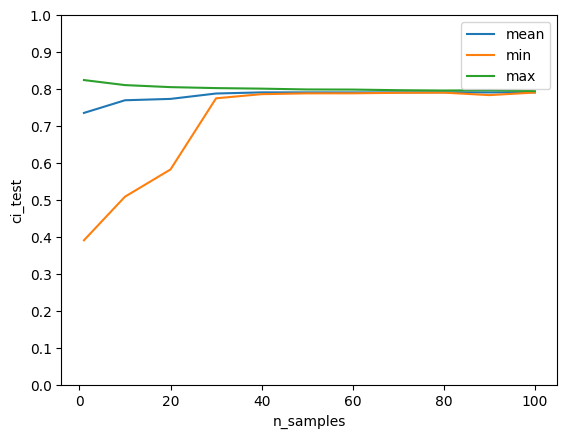

In [110]:
draw_pandas_plot(df, 'ci_test', np.arange(0, 1.1, 0.1))

<Axes: xlabel='n_samples', ylabel='ibs_test'>

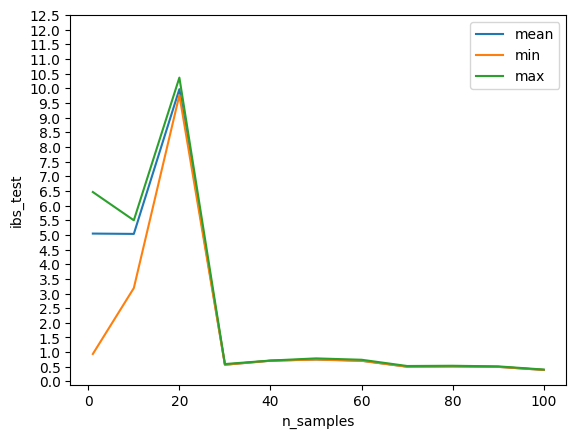

In [114]:
draw_pandas_plot(df, 'ibs_test', np.arange(0, 13, 0.5))

<Axes: xlabel='n_samples', ylabel='ibs_test'>

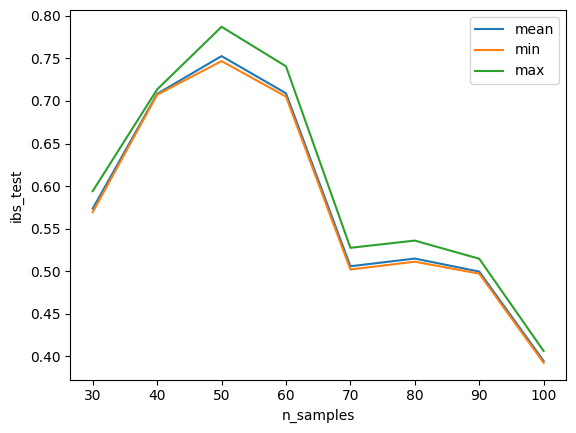

In [112]:
df_grouped = df.groupby('n_samples')['ibs_test']
metric_df = df.groupby('n_samples')['ibs_test'].agg(['mean', 'min', 'max'])
metric_df[metric_df.index > 20].plot(xlabel='n_samples', ylabel='ibs_test')

In [88]:
import plotly.express as px

In [89]:
def draw_plotly_plot(df, metric):
    df_grouped = df.groupby('n_samples')[metric]
    metric_df = df.groupby('n_samples')[metric].agg(['mean', 'min', 'max']).reset_index()
    fig = px.line(
    metric_df, x='n_samples', y='mean', 
    error_y=metric_df['max'] - metric_df['mean'], 
    error_y_minus=metric_df['mean'] - metric_df['min'], 
    title=f"График зависимости {metric_df} от n_samples",
    labels={'n_samples': 'Количество выборок', 'mean': f'Среднее значение {metric}'}
)
    return fig

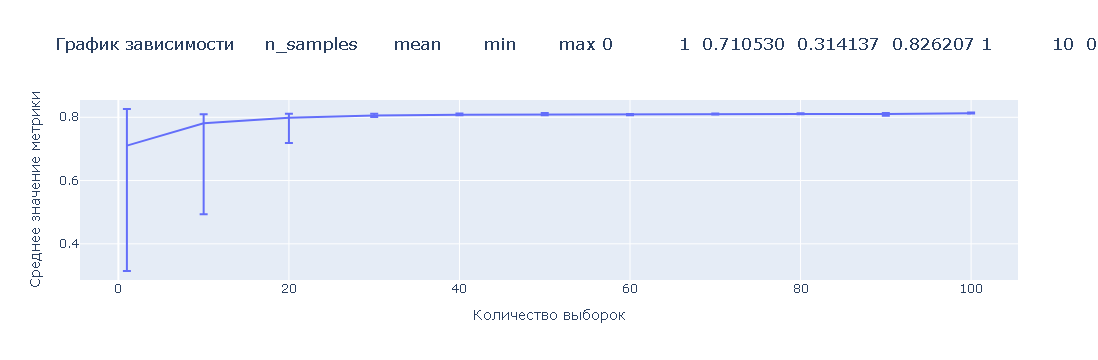

In [90]:
draw_plotly_plot(df, 'ci_train')

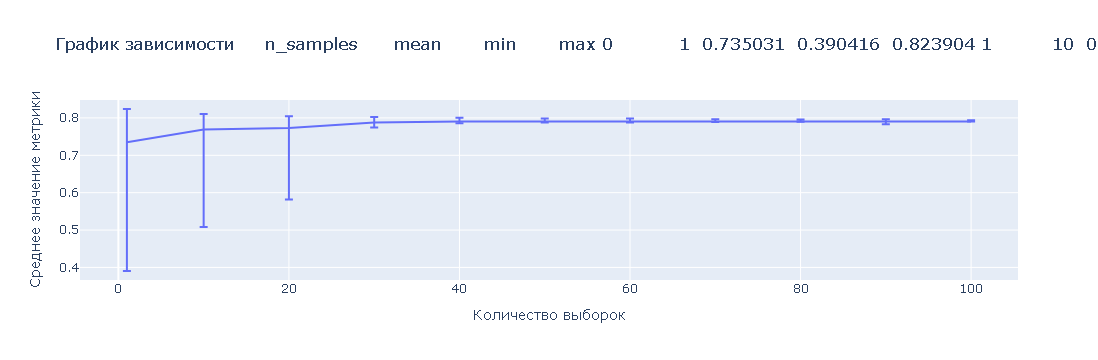

In [91]:
draw_plotly_plot(df, 'ci_test')

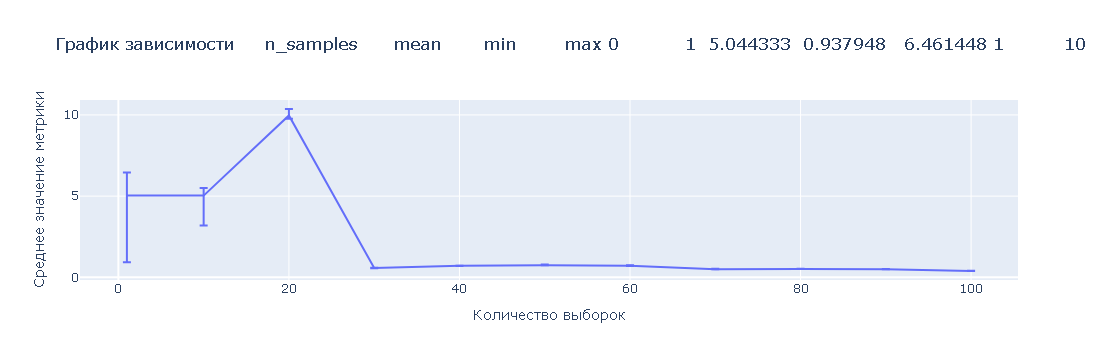

In [92]:
draw_plotly_plot(df, 'ibs_test')